<h5 align="center">Metody Obliczeniowe w Nauce i Technice </h5>
<h6 align="center">Labolatorium 10</h6>
<h6 align="center">Dyskretna Transformacja Fouriera</h6>
<h6 align="center">26 maja 2020</h6>

In [36]:
import numpy as np
import cmath
from scipy.linalg import dft
from random import random
import matplotlib.pyplot as pyplot
import math
import time

<b>Zadanie 1 FFT</b> <br><hr>
1. Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera Fn i nelementowego wektora wejściowego (y = Fnx)

In [2]:
def fourier_matrix(N):
    F = []
    w = complex(cmath.cos(cmath.pi*2/N),(-1)*cmath.sin(2*cmath.pi/N))
    for i in range(N):
        F.append([])
        for k in range(N):
            F[i].append(complex(0,0))
            F[i][k] = (pow(w,i*k))
    return F

def my_dft(A):
    N =  len(A)
    return np.dot(fourier_matrix(N),A)

Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną (x = F−1 n y) oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej.

In [6]:
def are_equals(A,B, delta):
    for i,e in enumerate(A):
            if(math.fabs(math.fabs(A[i].real) - math.fabs(B[i].real)) > delta or math.fabs(math.fabs(A[i].imag) - math.fabs(B[i].imag)) > delta):
                return False
    return True

In [7]:
for i in range(5):
    A = [random() for _ in range(5)]
    print(A)
    C = np.fft.fft(A)
    B = my_dft(A)

    print(C)
    print(B)
    print("Are equals ? ",are_equals(C,B,0.001))

[0.15694768556327565, 0.452540339726779, 0.7213172815146318, 0.026274869922564337, 0.6911191226094778]
[ 2.0481993 +0.j         -0.09445686-0.18163377j -0.53727358+0.8012577j
 -0.53727358-0.8012577j  -0.09445686+0.18163377j]
[ 2.0481993 +0.j         -0.09445686-0.18163377j -0.53727358+0.8012577j
 -0.53727358-0.8012577j  -0.09445686+0.18163377j]
Are equals ?  True
[0.7462526032755472, 0.28225266219247236, 0.523724086177052, 0.4055887981113764, 0.2611727736475663]
[2.21899092+0.j         0.16235038-0.08948635j 0.59378566+0.09996289j
 0.59378566-0.09996289j 0.16235038+0.08948635j]
[2.21899092+0.j         0.16235038-0.08948635j 0.59378566+0.09996289j
 0.59378566-0.09996289j 0.16235038+0.08948635j]
Are equals ?  True
[0.6027679280896425, 0.21309231779953985, 0.6297733948791747, 0.863004217168881, 0.47510978111557145]
[ 2.78374764+0.j         -0.39224838+0.38628305j  0.50729439-0.06780569j
  0.50729439+0.06780569j -0.39224838-0.38628305j]
[ 2.78374764+0.j         -0.39224838+0.38628305j  0.5

* Zimplementowana funkcja zgadza się z funkcją biblioteczną

2. Zaimplementuj również IDFT


In [8]:
def my_idft(A):
    N =  len(A)
    F = np.conjugate(fourier_matrix(N))
    F /= N
    return np.dot(F,A)

Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną (x = F−1 n y) oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej

In [9]:
for i in range(5):
    A = [random() for _ in range(5)]
    print(A)
    C = np.fft.ifft(A)
    B = my_idft(A)

    print(C)
    print(B)
    print("Are equals ? ",are_equals(C,B,0.001))

[0.46535378811078487, 0.90265985905967, 0.8723644259821067, 0.3493732993577414, 0.36002260593498714]
[ 0.5899548 -0.j         -0.02657249+0.16469703j -0.03572801-0.03568799j
 -0.03572801+0.03568799j -0.02657249-0.16469703j]
[ 0.5899548 +0.j         -0.02657249+0.16469703j -0.03572801-0.03568799j
 -0.03572801+0.03568799j -0.02657249-0.16469703j]
Are equals ?  True
[0.630745544654028, 0.21199300033753288, 0.25554493115555144, 0.5757927260265636, 0.301664819403769]
[0.3951482 -0.j         0.02338165-0.05470398j 0.09441702+0.0503732j
 0.09441702-0.0503732j  0.02338165+0.05470398j]
[0.3951482 +0.j         0.02338165-0.05470398j 0.09441702+0.0503732j
 0.09441702-0.0503732j  0.02338165+0.05470398j]
Are equals ?  True
[0.2804727200191619, 0.46524589560266694, 0.02749557300212102, 0.9065191861338691, 0.6970323927550452]
[ 0.47535315-0.j         -0.02319947-0.14742383j -0.07424075+0.13995209j
 -0.07424075-0.13995209j -0.02319947+0.14742383j]
[ 0.47535315+0.j         -0.02319947-0.14742383j -0.07

* Zimplementowana funkcja zgadza się z funkcją biblioteczną

3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz Fn dla danych o różnym rozmiarze.

In [33]:
def my_cooley_turkey(X):
    n = len(X)
    val = cmath.exp(-2*cmath.pi*1j/n)
    if n > 1:
        X = my_cooley_turkey(X[::2]) + my_cooley_turkey(X[1::2])
        for k in range(n//2):
            xk = X[k]
            X[k] = xk + val**k*X[k+n//2]
            X[k+n//2] = xk - val**k*X[k+n//2]
    return X

In [34]:
X = [complex(random(),random()) for _ in range(8)]
print(X)
A = np.fft.fft(X)
print("Are equals ? ",are_equals(my_cooley_turkey(X),A,0.001))


[(0.46093659382535623+0.8025481460507717j), (0.6784175226591062+0.31551795307858943j), (0.6887504625703335+0.6440980426534938j), (0.14170959577500486+0.26605605597660953j), (0.8034109341672279+0.24877521484897724j), (0.12569871774873342+0.46296382989041085j), (0.3068142661408817+0.8992497425335416j), (0.6288387946044528+0.7770364403175205j)]
Are equals ?  True


Jak widać wynik zgadza się z funkcją bibliteczną

* Testy czasowe:

In [37]:

for i in [2**5,2**6,2**7,2**8,2**9,2**10,2**11,2**12]:
    X = [complex(random(),random()) for _ in range(i)]

    print(f"Test dla macierzy o wielkosci {i} ")
    start = time.time()
    A = np.fft.fft(X)
    stop = time.time()
    t_lib = stop - start

    start = time.time()
    my_cooley_turkey(X)
    stop = time.time()
    t_wl = stop - start

    start = time.time()
    my_dft(X)
    stop = time.time()
    t_kw = stop - start

    print(f"Czasy:\n Biblioteka: {t_lib} Własny: {t_wl} kwadratowy: {t_kw}")


Test dla macierzy o wielkosci 32 
Czasy:
 Biblioteka: 0.0 Własny: 0.0 kwadratowy: 0.000997304916381836
Test dla macierzy o wielkosci 64 
Czasy:
 Biblioteka: 0.0009980201721191406 Własny: 0.0 kwadratowy: 0.0040166378021240234
Test dla macierzy o wielkosci 128 
Czasy:
 Biblioteka: 0.0 Własny: 0.0009968280792236328 kwadratowy: 0.014937400817871094
Test dla macierzy o wielkosci 256 
Czasy:
 Biblioteka: 0.001989603042602539 Własny: 0.000997304916381836 kwadratowy: 0.06482791900634766
Test dla macierzy o wielkosci 512 
Czasy:
 Biblioteka: 0.0 Własny: 0.0029909610748291016 kwadratowy: 0.18450474739074707
Test dla macierzy o wielkosci 1024 
Czasy:
 Biblioteka: 0.0 Własny: 0.010970830917358398 kwadratowy: 0.7958698272705078
Test dla macierzy o wielkosci 2048 
Czasy:
 Biblioteka: 0.0 Własny: 0.011966943740844727 kwadratowy: 2.942129611968994
Test dla macierzy o wielkosci 4096 
Czasy:
 Biblioteka: 0.0009980201721191406 Własny: 0.03693819046020508 kwadratowy: 12.249213218688965


<h6> Wnioski: </h6>
<hr>

* Jak widać wyniki najlepiej wyszły dla funkcji bibliotecznej, następnie dla zaimplementowanego algorytmu Colleya-Turkeya, a następnie dla pierwszego algorytmu

* Jest to spowodowane złożonośćią obliczeniową O(n*log(n)) dla algorytmu Colleya-Turkeya i O(n^2) dla standardowej implementacji

* Algorytm Colleya-Turkeya dzięki swojej złożoności zrewoluzjonizował przetwarzanie sygnału. Maniejsza złożoność pozwoliła na znaczne przyspieszenie wykonywanie operacji i dokładniejsze przetwarzanie sygnałów. 

<b>Zadanie 2 DFT w 1D</b> <br><hr>
* Wygeneruj dwa sygnały czasowo-amplitudowe:

1. Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach

2. Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie a), ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości

In [26]:
def generate_signal(ran):

    n1 = random()*10
    n2 = random()*10
    n3 = random()*10
    n4 = random()*10
    n5 = random()*10

    return (lambda x: cmath.sin(n1*x) + cmath.sin(n2*x) + cmath.sin(n3*x) + cmath.sin(n4*x) + cmath.sin(n5*x),
    lambda x: cmath.sin(n1*x) if x>=0 and x < ran/5 else cmath.sin(n2*x) if x>= ran/5 and x < 2*ran/5  else cmath.sin(n3*x) if x>= 2*ran/5 and x < 3*ran/5 else cmath.sin(n4*x) if x>= 3*ran/5 and x < 4*ran/5 else cmath.sin(n5*x))
#     return lambda x: cmath.sin(2*x),lambda  x: cmath.sin(5*x)

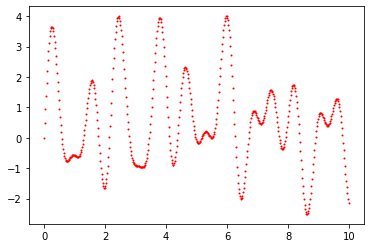

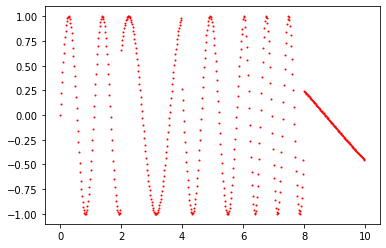

In [27]:
N = 10
ran = 500
s1,s2 = generate_signal(N)
x = []
y = []
x2 = []
y2 = []
for i in range(ran):
    x.append(i* N/ran )
    y.append(s1(i*N/ran))

    x2.append(N/ran * i)
    y2.append(s2(N/ran * i))


pyplot.plot(x,y,'ro',markersize=1)
pyplot.show()

pyplot.plot(x2,y2,'ro',markersize=1)
pyplot.show()

* Dokonaj transformacji sygnałów 1) i 2) do domeny częstotliwościowej, porównaj otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część urojoną wyniku transformacji

In [30]:
def draw_real(x,y):
    X = []
    Y= []
    for i in range(len(x)//2):
        X.append(x[i])
        Y.append(y[i].real + y[len(y)-i-1].real)
    pyplot.plot(X,Y)
    pyplot.show()

def draw_imag(x,y):
    X = []
    Y= []
    for i in range(len(x)//2):
        X.append(x[i])
        Y.append(y[i].imag + y[len(y)-i-1].imag)
    pyplot.plot(X,Y)
    pyplot.show()

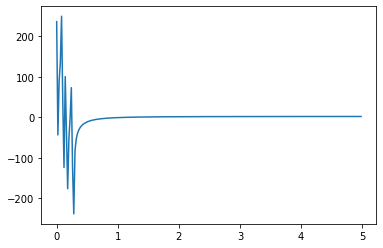

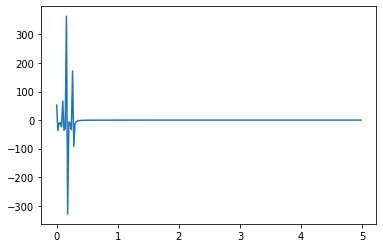

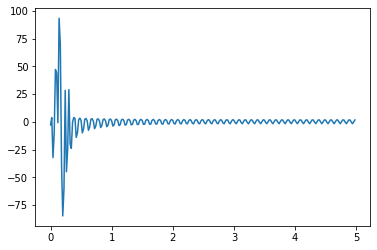

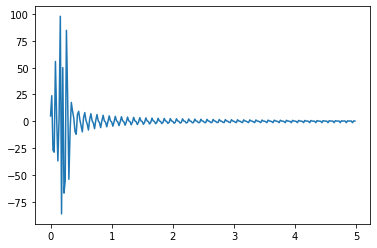

In [31]:
draw_real(x,y3)
draw_imag(x,y3)

draw_real(x2,y4)
draw_imag(x2,y4)

<h6> Wnioski: </h6>
<hr>

* Dyskretna Transformacja Fouriera pozwala na zniwelowanie szumów sygnału poprzez wyzerowanie amplitud wyższych harmoniczych. Jest to bardzo przydatne narzędzie w technice przetwarzania sygnałów.
* Dwu wymiarowa Dyskretna Transformacja Fouriera pozwala na redukcje szumów w obrazach
* Moduł liczby zespolonej reprezentuje amplitude harmonicznej natomiast, przesunięciem fazowym jest arguemnt liczby zespolonej

<h6> Pomocne Źródła: </h6><hr>
<a href="https://www.youtube.com/watch?v=WsJlJexWKPw" >https://www.youtube.com/watch?v=WsJlJexWKPw</a> <br>
<a href="https://pl.wikipedia.org/wiki/Algorytm_Cooleya-Tukeya" >https://pl.wikipedia.org/wiki/Algorytm_Cooleya-Tukeya</a>



